#  BAD Day 1: Frequency 

Many of the exmaples below are taken from the [Handbook of Biological Statistics](http://www.biostathandbook.com/exactgof.html). The pages in which the examples are presented are given at the begining of each example.

# 1. Cat paw example, exact binomial test
(pp. 30–31 http://www.biostathandbook.com/exactgof.html)

In this example:
* 2 is the number of successes: number of times the cat uses its right paw
* 10 is the number of trials (8 times it uses its left paw)

Can you conclude that it is right-pawed, or could this result have occured due to chance under the nul hypothesis that it bats equally with each paw?

---

Remembering that 0.5 is the hypothesized probability of sucess (unbiased).

First we calculate the probability of a single event only (non binomial test). 

In [1]:
dbinom( 2, 10, 0.5, FALSE)

[1] 0.04394531

The first number: 2 is whichever event there are fewer than expected of; in this case there are only two uses of the left paw, which is fewer than the expected 5. The second number, 10, is the total number of trials. The third number is the expected proportion of whichever event there were fewer than expected. The `FALSE` indicates to calculate the exact probability for that number of events only.

One-sided test:

In [2]:
binom.test(2, 10, 0.5, alternative = 'less', conf.level = 0.9 )


	Exact binomial test

data:  2 and 10
number of successes = 2, number of trials = 10, p-value = 0.05469
alternative hypothesis: true probability of success is less than 0.5
90 percent confidence interval:
 0.0000000 0.4496039
sample estimates:
probability of success 
                   0.2 


# 2. Probability density plot, binomial distribution, p. 31

In this example:
*  You can change the values for trials and prob
*  You can change the values for xlab and ylab

---

In [3]:
trials = 10
prob = 0.5

In [4]:
x = seq(0, trials)                   # x is a sequence, 1 to trials
y = dbinom(x, size=trials, p=prob)   # y is the vector of heights

Generating a bar-plot:

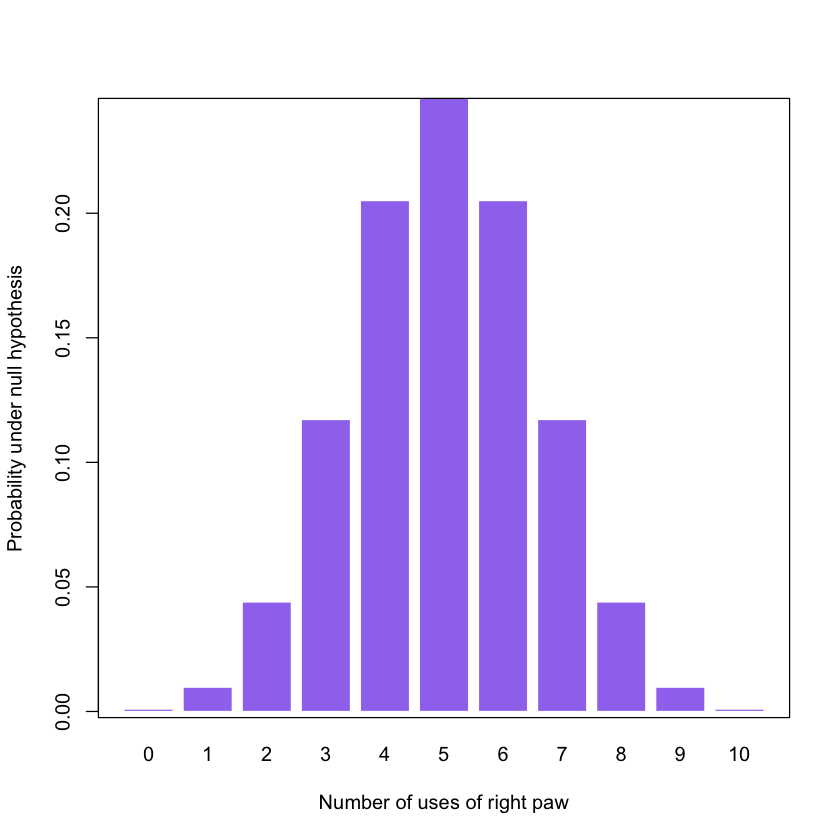

In [7]:
barplot (height=y, 
         names.arg=x,
         col = 'mediumpurple2', border = 'white',
         xlab = "Number of uses of right paw",
         ylab = "Probability under null hypothesis")
box()

#  3. Drosophila example, Chi-square goodness-of-fit

(pp. 46 http://www.biostathandbook.com/chigof.html)

The Chi Square goodness of fit is used when you have one nominal variable, you want to see if the number of observations in each category fits a theoretical expectation, and you have a large sample size. 

3:1 ratio of smooth wings to wrinkled wings in offspring from a bunch of Drosophila crosses.
You observe 770 flies with smooth wings and 230 flies with wrinkled wings; 
the expected values are 750 smooth-winged and 250 wrinkled-winged flies


In [8]:
observed = c(770, 230)        # observed frequencies
expected = c(0.75, 0.25)      # expected proportions

In [9]:
chisq.test(
  x = observed,
  p = expected, 
)


	Chi-squared test for given probabilities

data:  observed
X-squared = 2.1333, df = 1, p-value = 0.1441


#  4. Vaccination example, Chi-square independence 
(pp. 59–60  http://www.biostathandbook.com/chiind.html)

The chi-square test of independence is used when you have two nominal variables and you want to see whether the proportions of one variable are different for different values of the other variable. Use it when the sample size is large.

Jackson et al. (2013) wanted to know whether it is better to give the diphtheria, tetanus and pertussis (DTaP) vaccine in either the thigh or the arm, so they collected data on severe reactions to this vaccine in children aged 3 to 6 years old. One nominal variable is severe reaction vs. no severe reaction; the other nominal variable is thigh vs. arm.

In [10]:
Input =( 
  "Injection.area  No.severe  Severe
  Thigh           4788       30
  Arm             8916       76
  ")


In [11]:
Matrix = as.matrix(read.table(textConnection(Input),
                              header=TRUE, 
                              row.names=1))

Matrix

,No.severe,Severe
Thigh,4788,30
Arm,8916,76


In [12]:
chisq.test(Matrix, correct=TRUE)      # Continuity correction for 2 x 2


	Pearson's Chi-squared test with Yates' continuity correction

data:  Matrix
X-squared = 1.7579, df = 1, p-value = 0.1849


In [13]:
chisq.test(Matrix, correct=FALSE)      # No continuity correction for 2 x 2


	Pearson's Chi-squared test

data:  Matrix
X-squared = 2.0396, df = 1, p-value = 0.1533


# 5. Post-hoc example, Fisher’s exact test,
(pp. 79  http://www.biostathandbook.com/fishers.html)


The Fisher's exact test of independence is used when you have two nominal variables and you want to see whether the proportions of one variable are different depending on the value of the other variable. Use it when the sample size is small.


 Fredericks (2012) wanted to know whether checking termite monitoring stations frequently would scare termites away and make it harder to detect termites. He checked the stations (small bits of wood in plastic tubes, placed in the ground near termite colonies) either every day, every week, every month, or just once at the end of the three-month study, and recorded how many had termite damage by the end of the study:

In [14]:
Input =(
  
  "Frequency  Damaged  Undamaged
 Daily       1        24
 Weekly      5        20
 Monthly    14        11
 Quarterly  11        14
")

In [15]:
Matrix = as.matrix(read.table(textConnection(Input),
                              header=TRUE, 
                              row.names=1))

Matrix

,Damaged,Undamaged
Daily,1,24
Weekly,5,20
Monthly,14,11
Quarterly,11,14


The overall *p* value for this is p=0.00012 so it is highly significant,the frequency of disturbance is affecting the presence of termites.  

In [16]:
fisher.test(Matrix, alternative="two.sided")


	Fisher's Exact Test for Count Data

data:  Matrix
p-value = 0.0001228
alternative hypothesis: two.sided


In [17]:
install.packages('RVAideMemoire')



The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//RtmpHIRWuc/downloaded_packages


The p-values can be adjusted. See ?p.adjust for options

In [18]:
library('RVAideMemoire')
fisher.multcomp(Matrix, p.method = "none")

*** Package RVAideMemoire v 0.9-65 ***



        Pairwise comparisons using Fisher's exact test for count data

data:  Matrix

              Daily  Weekly Monthly
Weekly    0.1894630       -       -
Monthly   0.0001019 0.01863       -
Quarterly 0.0019215 0.12835  0.5721

P value adjustment method: none